MSE	Linear: 0.27
R2	Linear: 0.69


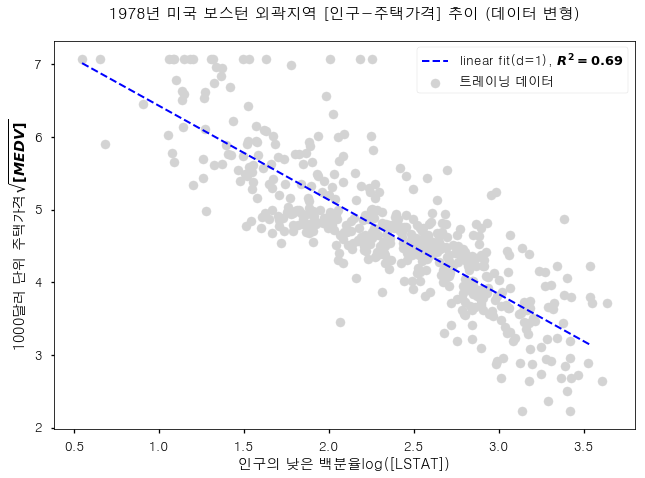

In [11]:
# 보스턴 외곽 지역 주택정보 14개 범주로 시작
# 회귀분석 - 다항회귀
# 개발자의 직관을 이용해 MEDV-LSTAT 데이터에서
# MEDV는 로그 값을 취하고, LSTAT은 제곱근 값을 취한 후, 단순 회귀 모델로 계산

%matplotlib inline
#import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import style
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import PolynomialFeatures

style.use('seaborn-talk')

krfont = {'family':'HYGothic-Medium', 'weight':'bold', 'size':10}
matplotlib.rc('font', **krfont)
matplotlib.rcParams['axes.unicode_minus'] = False

df = pd.read_csv('./data/housing.data', header=None, sep='\s+')
df.columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']

#Polynomial code

X_log = df[['LSTAT']].values
y_sqrt = df['MEDV'].values

X = np.log(X_log)
y = np.sqrt(y_sqrt)

# lr : Linear Regression (선형 회귀)
lr = LinearRegression()

# 회귀 계산
lr.fit(X, y)
X_fit = np.arange(X.min(), X.max(), 1)[:, np.newaxis]
y_lin_fit = lr.predict(X_fit)
y_lin_pred = lr.predict(X)

# 단순 회귀 모델의 예측값 계산
mse_lin = mean_squared_error(y, y_lin_pred)
r2_lin = r2_score(y, y_lin_pred)

print('MSE\tLinear: %.2f' %(mse_lin))
print('R2\tLinear: %.2f' %(r2_lin))


plt.scatter(X, y, label='트레이닝 데이터', c='lightgray')

plt.plot(X_fit, y_lin_fit, linestyle='--', label='linear fit(d=1), $R^2=%.2f$' %r2_lin, c='blue', lw=2)

plt.xlabel('인구의 낮은 백분율log([LSTAT])')
plt.ylabel('1000달러 단위 주택가격$\sqrt{[MEDV]}$')
plt.title('1978년 미국 보스턴 외곽지역 [인구-주택가격] 추이 (데이터 변형)\n')
plt.legend(loc=1)
plt.show()

# MSE : 평균제곱오차, 작을 수록 오차가 작다.
# R2 : 결정 계수, 1에 가까울 수록 적합도가 좋음 